In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile as zf
import imutils
import cv2
import dlib
import random
import tensorflow as tf

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,AveragePooling2D,Flatten,Dropout,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

from imutils import build_montages
from google.colab.patches import cv2_imshow

sns.set()

In [0]:
filepath_prototxt = '/content/deploy.prototxt.txt'
filepath_model = '/content/res10_300x300_ssd_iter_140000.caffemodel'

In [3]:
os.getcwd()

'/content'

In [0]:
handle_test=zf.ZipFile(r'/content/test.zip')
handle_test.extractall('/content/Testing')
handle_test.close()


handle_train=zf.ZipFile(r'/content/train.zip')
handle_train.extractall('/content/Training')
handle_train.close()



In [0]:
train_mask = os.listdir('/content/Training/train/with_mask/')
train_nomask = os.listdir('/content/Training/train/without_mask/')

test_mask = os.listdir('/content/Testing/test/with_mask/')
test_nomask = os.listdir('/content/Testing/test/without_mask/')


In [0]:
filepath_train_mask = '/content/Training/train/with_mask/'
filepath_train_nomask = '/content/Training/train/without_mask/'

filepath_test_mask = '/content/Testing/test/with_mask/'
filepath_test_nomask = '/content/Testing/test/without_mask/'


In [0]:
train_images = []
test_images = []
outputs = []

labels=[]
test_labels=[]

for i in train_mask:
  image = cv2.imread(filepath_train_mask+i)
  image = cv2.resize(image , (224,224))
  train_images.append(image)
  labels.append(1)

for i in train_nomask:
  image = cv2.imread(filepath_train_nomask+i)
  image = cv2.resize(image , (224,224))
  train_images.append(image)
  labels.append(0)

for i in test_mask:
  image = cv2.imread(filepath_test_mask+i)
  outputs.append(image)
  image = cv2.resize(image , (224,224))
  test_images.append(image)
  test_labels.append(1)

for i in test_nomask:
  image = cv2.imread(filepath_test_nomask+i)
  outputs.append(image)
  image = cv2.resize(image , (224,224))
  test_images.append(image)
  test_labels.append(0)



In [8]:
train_images[0].shape

(224, 224, 3)

In [9]:
test_images[0].shape

(224, 224, 3)

In [0]:
train_images = np.array(train_images , dtype="float") / 255.0
test_images = np.array(test_images , dtype="float") / 255.0
labels = np.array(labels)

In [11]:
train_images.shape

(1250, 224, 224, 3)

In [12]:
test_images.shape

(194, 224, 224, 3)

In [0]:
(trainX , testX , trainY , testY) = train_test_split(train_images , labels, train_size=0.80 , test_size=0.20 , random_state=42) 

In [14]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(1000, 224, 224, 3)
<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>
(250, 224, 224, 3)
<class 'numpy.ndarray'>
(250,)


In [15]:
trainY

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [0]:
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [17]:
trainY
# 1 0 is nomask
# 0 1 is mask

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [29]:
aug=ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

baseModel=MobileNetV2(weights="imagenet",include_top=False,
      input_tensor=tf.keras.layers.Input(shape=(224,224,3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=opt , metrics=["accuracy"])

In [33]:
H = model.fit(aug.flow(trainX,trainY,batch_size=BS) , epochs=EPOCHS ,
              steps_per_epoch=len(trainX) // BS,
              validation_data=(testX,testY),
              validation_steps=len(testX) // BS)

Epoch 1/20
31/31 [==============================] - 10s 333ms/step - loss: 0.4663 - accuracy: 0.7823 - val_loss: 0.1598 - val_accuracy: 0.9760
Epoch 2/20
31/31 [==============================] - 10s 309ms/step - loss: 0.1512 - accuracy: 0.9545 - val_loss: 0.0838 - val_accuracy: 0.9840
Epoch 3/20
31/31 [==============================] - 9s 301ms/step - loss: 0.1049 - accuracy: 0.9649 - val_loss: 0.0605 - val_accuracy: 0.9840
Epoch 4/20
31/31 [==============================] - 9s 298ms/step - loss: 0.0898 - accuracy: 0.9752 - val_loss: 0.0469 - val_accuracy: 0.9840
Epoch 5/20
31/31 [==============================] - 9s 299ms/step - loss: 0.0617 - accuracy: 0.9814 - val_loss: 0.0367 - val_accuracy: 0.9840
Epoch 6/20
31/31 [==============================] - 9s 302ms/step - loss: 0.0545 - accuracy: 0.9835 - val_loss: 0.0377 - val_accuracy: 0.9880
Epoch 7/20
31/31 [==============================] - 9s 299ms/step - loss: 0.0428 - accuracy: 0.9886 - val_loss: 0.0305 - val_accuracy: 0.9840
Epoc

In [34]:
predictions = model.predict(testX)
predictions

array([[9.99966502e-01, 3.34582182e-05],
       [9.99669909e-01, 3.30147042e-04],
       [2.45414793e-01, 7.54585207e-01],
       [9.97659802e-01, 2.34024273e-03],
       [3.07727070e-03, 9.96922672e-01],
       [2.78294783e-06, 9.99997258e-01],
       [9.99974370e-01, 2.56196217e-05],
       [4.91037965e-03, 9.95089591e-01],
       [2.68490374e-01, 7.31509566e-01],
       [4.18187497e-04, 9.99581873e-01],
       [9.96274233e-01, 3.72575247e-03],
       [9.99452055e-01, 5.47904463e-04],
       [9.60119214e-05, 9.99904037e-01],
       [6.68893481e-05, 9.99933124e-01],
       [9.99181092e-01, 8.18874862e-04],
       [9.99678493e-01, 3.21560365e-04],
       [9.99681354e-01, 3.18663253e-04],
       [9.99645591e-01, 3.54401709e-04],
       [9.98462439e-01, 1.53756794e-03],
       [9.99118626e-01, 8.81367188e-04],
       [3.23275162e-05, 9.99967694e-01],
       [9.99030232e-01, 9.69812507e-04],
       [9.99996901e-01, 3.10742780e-06],
       [9.99853373e-01, 1.46619641e-04],
       [1.059381

In [35]:
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=["NoMask","Mask"]))

              precision    recall  f1-score   support

      NoMask       1.00      0.98      0.99       116
        Mask       0.99      1.00      0.99       134

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [36]:
cnf = confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
cnf

array([[114,   2],
       [  0, 134]])

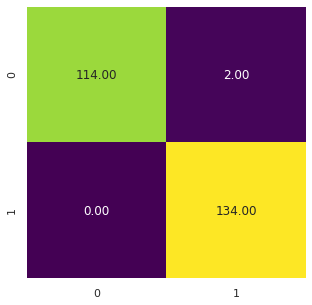

In [37]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf, annot=True, cmap="viridis", cbar=False, fmt=".2f")
plt.show()

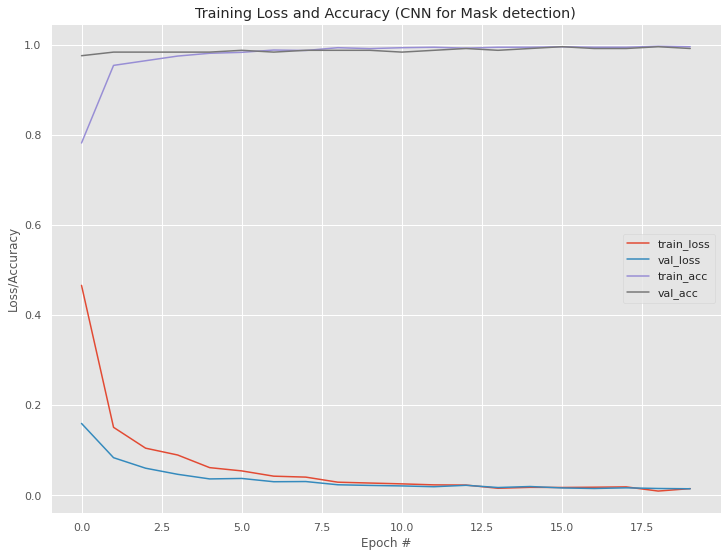

In [38]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(12,9))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (CNN for Mask detection)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [39]:
preds = model.predict(test_images)
preds

array([[4.36208647e-05, 9.99956369e-01],
       [2.49768724e-04, 9.99750197e-01],
       [4.92908759e-03, 9.95070934e-01],
       [4.61837772e-05, 9.99953866e-01],
       [4.03269551e-05, 9.99959707e-01],
       [3.21682106e-04, 9.99678373e-01],
       [1.10539375e-04, 9.99889493e-01],
       [3.89972096e-03, 9.96100307e-01],
       [4.10847897e-05, 9.99958873e-01],
       [3.56909062e-04, 9.99643087e-01],
       [2.52917554e-04, 9.99747097e-01],
       [3.76483622e-05, 9.99962330e-01],
       [8.69488402e-04, 9.99130547e-01],
       [1.56630849e-04, 9.99843359e-01],
       [8.98080121e-04, 9.99101996e-01],
       [8.93280581e-02, 9.10671949e-01],
       [2.90982280e-05, 9.99970913e-01],
       [3.99363998e-05, 9.99960065e-01],
       [2.57706160e-05, 9.99974251e-01],
       [1.67886596e-04, 9.99832034e-01],
       [8.96062795e-03, 9.91039336e-01],
       [5.05047385e-04, 9.99494910e-01],
       [6.39004975e-06, 9.99993563e-01],
       [2.81724842e-05, 9.99971867e-01],
       [7.109590

In [0]:
#useful indexes -> 93,106,9,89,123,151,53,84
# check index -> 85 , 54 ,53

In [41]:
indexes = np.random.randint(0,190, 16)
indexes

array([ 26, 165,  81,  55, 185,  93, 133,  34, 154,  72, 163,  25, 108,
       108, 121,  62])

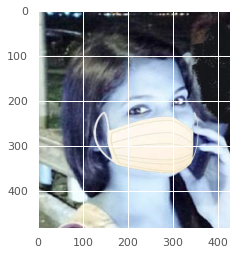

In [42]:
plt.imshow(outputs[indexes[0]])

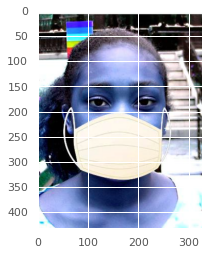

In [43]:
plt.imshow(outputs[indexes[-1]])

In [0]:
i_vals = []

for i in indexes:
  val = preds.argmax(axis=1)[i]
  i_vals.append(val)


In [45]:
i_vals

[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

In [0]:
vals = []

for i in indexes:
  val = np.amax(preds, axis=1)[i]
  vals.append(val)


In [47]:
vals

[0.99997354,
 0.99843115,
 0.9955949,
 0.9995869,
 0.9998981,
 0.999587,
 0.9999924,
 0.9999945,
 0.9999833,
 0.99951446,
 0.999749,
 0.99997854,
 0.99994874,
 0.99994874,
 0.99915874,
 0.9988079]

In [48]:
vals = [i *100 for i in vals]
vals

[99.99735355377197,
 99.8431146144867,
 99.55949187278748,
 99.95868802070618,
 99.98980760574341,
 99.95869994163513,
 99.99923706054688,
 99.99945163726807,
 99.99833106994629,
 99.95144605636597,
 99.97490048408508,
 99.99785423278809,
 99.99487400054932,
 99.99487400054932,
 99.91587400436401,
 99.88079071044922]

In [49]:
vals = [round(num,2) for num in vals]
vals

[100.0,
 99.84,
 99.56,
 99.96,
 99.99,
 99.96,
 100.0,
 100.0,
 100.0,
 99.95,
 99.97,
 100.0,
 99.99,
 99.99,
 99.92,
 99.88]

In [0]:
conf = 0.70
no_conf = 1.99

In [0]:
net = cv2.dnn.readNetFromCaffe(filepath_prototxt , filepath_model)

In [0]:
result = []

for i in i_vals:
  if i == 1:
    result.append("Mask")
  else:
    result.append("NoMask")


In [53]:
result

['Mask',
 'NoMask',
 'Mask',
 'Mask',
 'NoMask',
 'Mask',
 'NoMask',
 'Mask',
 'NoMask',
 'Mask',
 'NoMask',
 'Mask',
 'NoMask',
 'NoMask',
 'NoMask',
 'Mask']

In [0]:
final_results = []

for i in range(16):

  image = outputs[indexes[i]]
  (h,w) = image.shape[:2]

  blob = cv2.dnn.blobFromImage(cv2.resize(image,(300,300)), 1.0 ,(300,300) ,(104.0, 177.0, 123.0))

  net.setInput(blob)
  detections = net.forward()

  counter = 0

  for i2 in range(0 , detections.shape[2]):

    confidence = detections[0,0,i2,2]

    if( (confidence > conf) and (confidence < no_conf) and (counter == 0) ):
      box = detections[0,0,i2,3:7]*np.array([w,h,w,h])
      (startX , startY , endX , endY) = box.astype("int")

      text = str(result[i])+" : "+str(vals[i])

      y = startY - 10 if startY - 10 > 10 else startY + 10

      if i_vals[i] == 1:
        color = (0,255,0)

      else:
        color = (0,0,255)

      cv2.rectangle(image , (startX , startY) , (endX,endY) , color , 2)

      cv2.putText(image , text , (startX , y) , cv2.FONT_HERSHEY_SIMPLEX , 0.45 , (255,255,255), 2)

      final_results.append(image)

      counter = counter+1



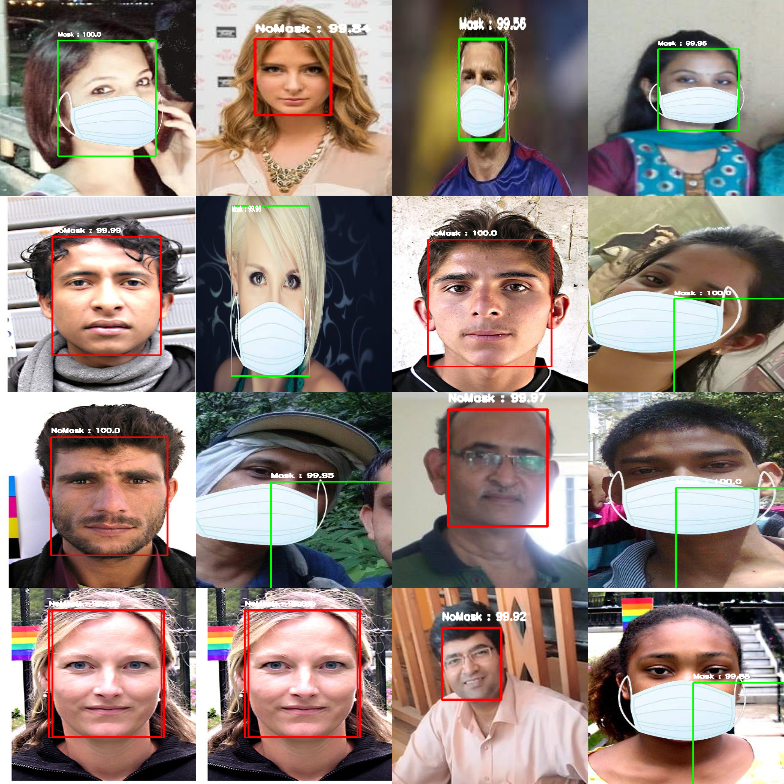

-1

In [55]:
montage = build_montages(final_results , (196,196), (4,4))[0]

cv2_imshow(montage)
cv2.waitKey(0)

In [56]:
model.save('mask_detection_2.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mask_detection_2.model/assets


In [0]:
from google.colab import files
files.download('mask_detection_2.model')

In [0]:

model_json = model.to_json()
with open("model3.json", "w") as json_file:
  json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model3.h5")

In [0]:

from google.colab import files
files.download("model3.h5")

In [0]:
from google.colab import files
files.download("model3.json")